There is a 1-based binary matrix where 0 represents land and 1 represents water. You are given integers row and col representing the number of rows and columns in the matrix, respectively.

Initially on day 0, the entire matrix is land. However, each day a new cell becomes flooded with water. You are given a 1-based 2D array cells, where cells[i] = [ri, ci] represents that on the ith day, the cell on the rith row and cith column (1-based coordinates) will be covered with water (i.e., changed to 1).

You want to find the last day that it is possible to walk from the top to the bottom by only walking on land cells. You can start from any cell in the top row and end at any cell in the bottom row. You can only travel in the four cardinal directions (left, right, up, and down).

Return the last day where it is possible to walk from the top to the bottom by only walking on land cells.

 

Example 1:

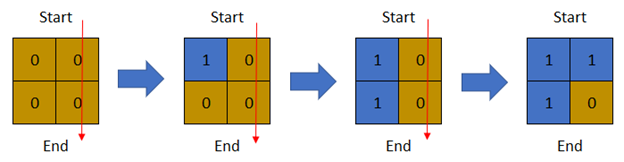

Input: row = 2, col = 2, cells = [[1,1],[2,1],[1,2],[2,2]]
Output: 2
Explanation: The above image depicts how the matrix changes each day starting from day 0.
The last day where it is possible to cross from top to bottom is on day 2.

Example 2:

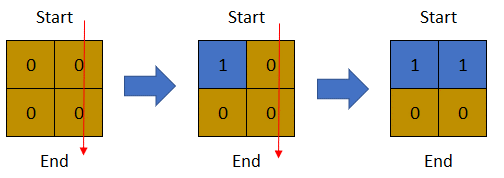

Input: row = 2, col = 2, cells = [[1,1],[1,2],[2,1],[2,2]]
Output: 1
Explanation: The above image depicts how the matrix changes each day starting from day 0.
The last day where it is possible to cross from top to bottom is on day 1.

Example 3:

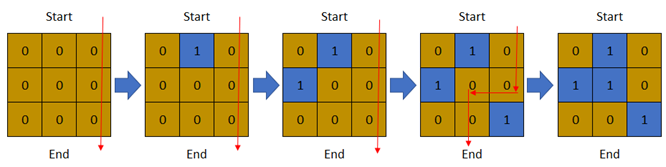

Input: row = 3, col = 3, cells = [[1,2],[2,1],[3,3],[2,2],[1,1],[1,3],[2,3],[3,2],[3,1]]
Output: 3
Explanation: The above image depicts how the matrix changes each day starting from day 0.
The last day where it is possible to cross from top to bottom is on day 3.

 

Constraints:

    2 <= row, col <= 2 * 104
    4 <= row * col <= 2 * 104
    cells.length == row * col
    1 <= ri <= row
    1 <= ci <= col
    All the values of cells are unique.



In [ ]:
class Solution:
    def latestDayToCross(self, row: int, col: int, cells: List[List[int]]) -> int:
        left, right = 1, row * col
        
        while left < right:
            mid = right - (right - left) // 2
            if self.canCross(row, col, cells, mid):
                left = mid
            else:
                right = mid - 1
                
        return left
    
    def canCross(self, row, col, cells, day):
        grid = [[0] * col for _ in range(row)]
        queue = collections.deque()
        
        for r, c in cells[:day]:
            grid[r - 1][c - 1] = 1
            
        for i in range(col):
            if not grid[0][i]:
                queue.append((0, i))
                grid[0][i] = -1

        while queue:
            r, c = queue.popleft()
            if r == row - 1:
                return True
            for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                new_row, new_col = r + dr, c + dc
                if 0 <= new_row < row and 0 <= new_col < col and grid[new_row][new_col] == 0:
                    grid[new_row][new_col] = -1
                    queue.append((new_row, new_col))
                    
        return False